# Sounds analysis of a Shepard tone

This is a spectogram of a **Sheppard tone example**. A Sheppard tone is like a **auditory illusion** like the famous Penrose triangle or stairs visual illusions.

A Shepard tone is a sound consisting of a **superposition of sine waves separated by octaves**. 
When played with the bass pitch of the tone moving upward or downward, it is referred to as the Shepard scale. **This creates the auditory illusion of a tone that continually ascends or descends in pitch**, yet which ultimately seems to get no higher or lower.

## 1. Informations

In [1]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [2]:
import datetime
today = datetime.datetime.now()
print("Today is", today)

Today is 2021-07-22 11:05:15.963562


In [3]:
#!pip install librosa
#!pip install noisereduce
#!pip install seaborn

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import librosa, librosa.display, IPython.display as ipd
import numpy as np
import noisereduce as nr
import wave
from scipy.io import wavfile as wav
import os
import os.path, time
import seaborn

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## 2. Sound analysis

In [12]:
audiofile = 'Example_Shepard_Tones.wav'

In [13]:
from os.path import getsize
sizefile=getsize(audiofile)
print(f"Size of {audiofile} file = {sizefile}")

Size of Example_Shepard_Tones.wav file = 2789228


In [14]:
print("File last modified date: %s" % time.ctime(os.path.getmtime(audiofile)))
print("Created: %s" % time.ctime(os.path.getctime(audiofile)))

File last modified date: Thu Jul 22 11:07:45 2021
Created: Thu Jul 22 11:07:45 2021


In [15]:
samples, sampling_rate = librosa.load(audiofile, offset = 0.0, duration = None)
len(samples), sampling_rate

(1394496, 22050)

In [16]:
duration=len(samples)/sampling_rate
print("Audio file duration =", duration, 'seconds.')

Audio file duration = 63.242448979591835 seconds.


## 3. Audio

In [17]:
from IPython.display import Audio
Audio(audiofile)

## 4. Signal

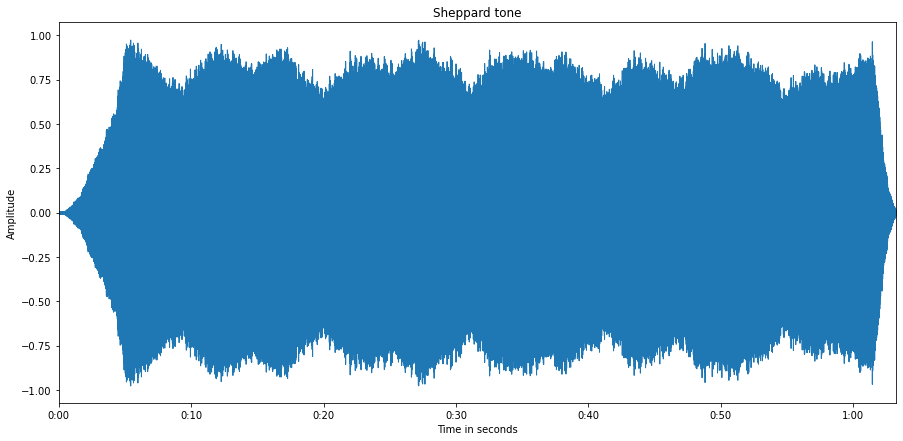

In [19]:
from librosa import display

plt.figure(figsize=(15,7))

librosa.display.waveplot(y=samples, sr=sampling_rate)
plt.title('Sheppard tone')
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.savefig('signal.jpg')

In [20]:
y, sr = librosa.load(audiofile)

In [21]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [22]:
tempo

0

> No tempo in the sound.

In [23]:
beat_frames

array([], dtype=int64)

## 5. Spectrum using FFT

The fast Fourier transform (FFT) is an algorithm that can efficiently compute the Fourier transform:

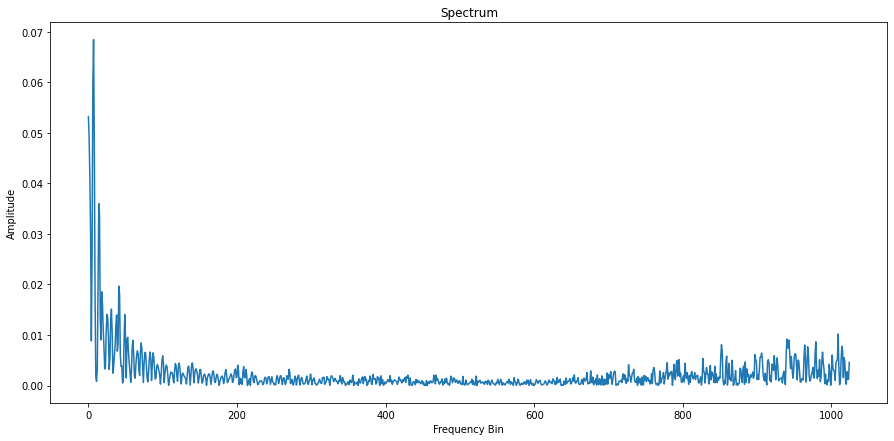

In [24]:
plt.figure(figsize=(15,7))
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');
plt.savefig('spectrum.jpg')

## 6. Spectogram

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

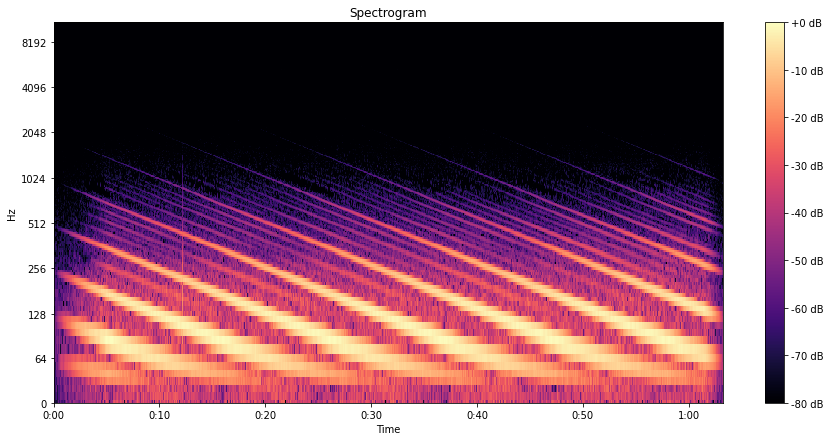

In [25]:
plt.figure(figsize=(15,7))
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');
plt.savefig('spectogram.jpg')

# 7. Creation of an Azure Machine Learning experiment

Now let's connect to an Azure ML workspace, create an experiment and let's save our results.

In [26]:
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace

In [27]:
print("You are using Azure ML", azureml.core.VERSION)

You are using Azure ML 1.20.0


In [28]:
from azureml.core import Workspace

ws = Workspace.from_config()
print('Azure ML Workspace name: ' + ws.name, 
      'Azure region: ' + ws.location, 
      'Resource group: ' + ws.resource_group, sep='\n')

Azure ML Workspace name: azuremlsound
Azure region: westeurope
Resource group: azuremlsound-rg


In [29]:
from azureml.core import experiment
experiment = Experiment(workspace=ws, name="Sheppard")

### Now let's log in an Azure ML experiment the graphs & some stats

In [30]:
run = experiment.start_logging()

run.log('Audio file duration', duration)
run.log('Audio sampling rate', sampling_rate)
run.log('Audio file size', sizefile )

run.log_image('Signal', 'signal.jpg')
run.log_image('Spectrum', 'spectrum.jpg')
run.log_image('Spectogram', 'spectogram.jpg')

run.complete()

In [31]:
experiment

Name,Workspace,Report Page,Docs Page
Sheppard,azuremlsound,Link to Azure Machine Learning studio,Link to Documentation


### Results are now available in an Azure ML experiment: